# Исследование о заведениях общественного питания Москвы.


**Описание проекта**


Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?


**Описание данных**

Таблица rest_data:

id — идентификатор объекта;

object_name — название объекта общественного питания;

chain — сетевой ресторан;

object_type — тип объекта общественного питания;

address — адрес;

number — количество посадочных мест.


*будем исследовать рынок и решим какое именно заведение лучше открыть*

# Описание работы
## Table Of Contents:
1. [Загрузим таблицу и подготовим данные](#first-bullet)
2. [Анализ данных](#second-bullet)

    2.1. [Исследуем соотношение видов объектов общественного питания по количеству](#t3)
    
    2.2. [Соотношение сетевых и несетевых заведений по количеству](#t4)
    
    2.3. [Найдем для какого вида объекта общепита характерно сетевое распространение](#t5)
    
    2.4. [Выясним что характерно для сетевых заведений:много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? ](#t6)
    
    2.5. [Для каждого вида объекта определим среднее число посадочных мест и какой вид объекта предоставляет в среднем самое большое число посдочных мест](#t7)
    
    2.6. [Работаем с адресом](#t8)
    
    2.7. [Найдём число улиц с одним объектом общественного питания](#t9)
    
    2.8. [Общий вывод и презентация](#t10)

## Загрузим таблицу и подготовим данные <a name="first-bullet"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('rest_data.csv')
df.head()

id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50

In [3]:
df.info()
# пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
# посмотрим какие значения у нас есть в колонках
for column in df.columns.values:
    print('для {}'.format(column))
    print(f"unique = {df[column].unique()}, длиной = {len(df[column].unique())}")
    print('---------------')

для id
unique = [151635  77874  24309 ... 209186 221900 222535], длиной = 15366
---------------
для object_name
unique = ['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'Бар Мята Lounge'
 'Мята Lounge Октябрьская' 'Кальянная «Мята Lounge»'], длиной = 10393
---------------
для chain
unique = ['нет' 'да'], длиной = 2
---------------
для object_type
unique = ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)'], длиной = 9
---------------
для address
unique = ['город Москва, улица Егора Абакумова, дом 9'
 'город Москва, улица Талалихина, дом 2/1, корпус 1'
 'город Москва, Абельмановская улица, дом 6' ...
 'город Москва, Салтыковская улица, дом 7Г'
 'город Москва, Осенний бульвар, дом 9'
 'город Москва, улица Новый Арбат, дом 13'], длиной = 9108
---------------
для number
unique = [  48   35   95   40   50  240   10   90  150  120    5   24  140   32
  270  320    7    2  160   20   30  110    6  192   65   45    4 

Проверим данные на пропуски и явные дубликаты

In [5]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [6]:
df.duplicated().sum()

0

Никаких аномалий не наблюдается, можем приступать к анализу данных

Проверим на еявные дубликаты

In [7]:
# проверим сколько уникальных id для группировки по названию заведения, адресу и тд
# получим индексы строк - неявных дубликатов
index_dupl = df.groupby(['object_name', 'object_type', 'address', \
                         'number', 'chain']).count().reset_index().query('id != 1').index
# скопируем старый датает, и удалим дубликаты
df_old = df.copy()
df = df.drop(index= index_dupl)

## Анализ данных <a name="second-bullet"></a>

### Исследуем соотношение видов объектов общественного питания по количеству <a name="t3"></a>

сгруппируем по типу объекта и посчитаем количество каждого

In [8]:
df_object_type = df.groupby('object_type').count().reset_index().iloc[:, :2].rename(columns = {
    'object_type' : 'object_type', 
    'id' : 'count_type'
}).sort_values(by = 'count_type', ascending= False)
name_objects = df_object_type['object_type']
values = df_object_type['count_type']
pie = go.Pie(labels= name_objects, values= values)
bar = go.Bar(x = name_objects, y = values)
#go.Figure(bar)
#go.Figure(pie)

# отобразим два графика
fig = make_subplots(rows = 1, cols = 2, specs= [
    [{'type' : 'domain'}, {'type': 'xy'}]
])
fig.add_trace(pie, 1, 1)
fig.add_trace(bar, 1, 2)
fig.update_layout(height=600, showlegend=True)
fig.update_xaxes(tickangle = 45)
fig.show()

Рынок в основном состоит из кафе, столовых, ресторанов и фаст-фуда                   

### Соотношение сетевых и несетевых заведений по количеству <a name = "t4"></a>

In [9]:
# напишем функцию для получения pie-plot с разделением на сетевые / несетевые заведения
# по умолчанию будет отображаться распределение по всем видам заведений

def get_pie_chain(df, type_object = '(все сразу)'):
    # найдём число сетевых/несетевых объектов в данной таблице
    df_chain_count = df.groupby('chain').count().reset_index().iloc[:, :2].rename(columns = {
        'chain' : 'chain',
        'id' : 'count_chain'
    })
    # визуализируем соотношение
    x = df_chain_count['chain']
    y = df_chain_count['count_chain']
    pie = go.Pie(labels = x, values= y\
                , marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=0.5)))
    fig = go.Figure(pie)
    fig.update_layout(title = f"Заведение {type_object} сетевое?")
    return fig, type_object, pie
    

In [10]:
get_pie_chain(df)[0].show()

Видим что подавляющее большинство заведений не сетевые

### Найдем для какого вида объекта общепита характерно сетевое распространение <a name = "t5"></a> 

In [11]:
# отфильтруем и оставляем только сетевые
df_chain = df.query('chain == "да"')
df_chain_g = df_chain.groupby('object_type').count().reset_index().iloc[:, :2].rename(columns = {
    'object_type' : 'object_type', 
    'id' : 'count_type'
}).sort_values(by = 'count_type', ascending= False)
df_chain_g.head(5)

object_type  count_type
3                               кафе        1391
6  предприятие быстрого обслуживания         790
7                           ресторан         543
5          магазин (отдел кулинарии)          75
2                         закусочная          56

Видим что среди сетевых больше всего : кафе, фаст-фудов и ресторанов.
Их может быть больше всего потому, что они в принципе занимют большую часть рынка.

Нужно посмотреть долю сетевого распространения в каждом из видов объектов

In [12]:
# присоеденим к таблице общее число заведений, потом посчитаем долю сетевый
df_chain_g = df_chain_g.merge(
    df.groupby('object_type').count().reset_index().iloc[:, :2].rename(columns = {
    'object_type' : 'object_type', 
    'id' : 'count_type'
}), on = 'object_type'
).rename(columns = {
    'count_type_x' : 'is_chain',
    'count_type_y' : 'all'
})
df_chain_g['chain_per_all'] = df_chain_g['is_chain'] / df_chain_g['all']
df_chain_g.sort_values(by = 'chain_per_all', ascending=False)

object_type  is_chain   all  chain_per_all
1  предприятие быстрого обслуживания       790  1918       0.411887
3          магазин (отдел кулинарии)        75   270       0.277778
2                           ресторан       543  2276       0.238576
0                               кафе      1391  6072       0.229084
4                         закусочная        56   360       0.155556
5                          кафетерий        52   397       0.130982
6                                бар        37   851       0.043478
7                              буфет        11   585       0.018803
8                           столовая         3  2575       0.001165

Фаст-фуд переехал со второго на первое место, а вот кафе скатились с 1 на 4 место

Отразим долю сетевого распространения для каждого типа объекта

In [13]:
fig = make_subplots(rows = 3, cols = 3, specs=\
                    [[{'type' : 'domain'}, {'type' : 'domain'}, {'type' : 'domain'}]]*3,
                   subplot_titles=('кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'))

for n, name in enumerate(df['object_type'].unique()):
    # дастанем данные только для конкретного типа объекта 
    df_name = df.query('object_type == @name')
    pie_name = get_pie_chain(df_name)[2]
    fig.add_trace(pie_name, n//3+1 ,n%3 +1)
    
fig.update_layout(title = "Доля сетевых заведений в каждом типе объекта", height=800)

Видим что сетевыми заведениями являются :
* кафе
* рестораны
* магазины
* предприятия быстрого обслуживания
* закусочные

### Выясним, что характерно для сетевых заведений:

### много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? <a name = "t6"></a>

Не понятно где граница между большим и маленьким числом посадочных мест, попробуем посмотреть гистограммы распределения посадочных мест в общем и с разбивкой по виду объекта

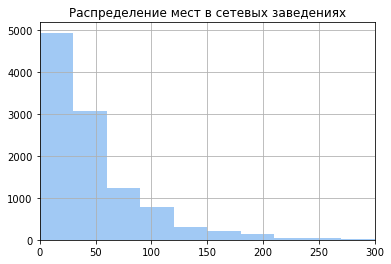

In [14]:
# создадим подвыборку с сетевыми заведениями
chain_list = ['кафе', 'закусочная','предприятие быстрого обслуживания',\
              'ресторан','магазин (отдел кулинарии)']
df_chain = df[df['object_type'].isin(chain_list)]

sns.set_palette('pastel')
df_chain['number'].hist(bins = 50)
plt.title('Распределение мест в сетевых заведениях')
plt.xlim(0, 300)
plt.show()

Основная масса заведений - с числом посадочных мест до 100-150

Построим распределение с разбивкой по виду заведения

In [15]:
from plotly.figure_factory import create_distplot

hist_data = []
group_labels = []

for name in chain_list:
    group_labels.append(name)
    hist_data.append(df_chain.query('object_type == @name')['number'])

fig = create_distplot(hist_data, group_labels, bin_size=1, )
fig.update_xaxes(range = [0,200])
#fig.update_yaxes(range = [0,0.4])
fig.update_layout(legend=dict(
    y=0.99,
    x=0.5
), 
title = 'Распределение числа посадочных мест по виду заведения')


fig.show()

In [16]:
fig = go.Figure()

for name in chain_list:
    df_name = df_chain.query('object_type == @name')['number']
    fig.add_trace(go.Violin(
        y = df_name, 
        name = name,
        box_visible=True,
        
    ))
fig.update_layout(title = 'Распределение числа посадочных мест по виду заведения')    
fig.show()

Видим что :

*кафе*

     Q1 = 15, Q2 = 30, Q3 = 50 

*закусочная*

     Q1 = 0, Q2 = 0, Q3 = 10 

*фаст-фуд*

     Q1 = 0,Q2 = 5, Q3 = 25 

*ресторан*

     Q1 = 46,Q2 = 80, Q3 = 114

*магазин*

     Q1 = 0,Q2 = 0, Q3 = 8 

<div class="alert alert-info"> 
    
 рассмотрим отношение двух переменных - количество посадочных мест и количество заведений одной сети, категоризируем по 4 группам (много/много, много/мало/, мало/много, мало/мало)
</div>

In [17]:
# получим таблицу с количеством заведений для каждого сетевого, посчитаем среднее число посадочных мест
df_chian_ = df.query('chain == "да"')
df_chian_gr =  df_chian_.groupby('object_name').agg({
    'id' : 'count',
    'number' : 'mean'
}).reset_index().rename(columns = {
    'id' : 'count_id',
    'number' : 'avg_number'
})
df_chian_gr

object_name  count_id  avg_number
0    Beverly Hills Diner         1   88.000000
1               Bierloga         1   75.000000
2          Black & White         1   40.000000
3             Bocconcino         3   66.666667
4                  BooBo         1   46.000000
..                   ...       ...         ...
718    кафе «Папа Джонс»         1   24.000000
719      кафе «Старбакс»         2   63.500000
720   кафе «Шоколадница»         1   50.000000
721    ресторан «Брудер»         1   86.000000
722  ресторан «Якитория»         1  124.000000

[723 rows x 3 columns]

Найдем границы для деления на группы


In [18]:
df_chian_gr.avg_number.describe()
# больше 60 посадочных мест будем считать много

count    723.000000
mean      60.400822
std       56.120311
min        0.000000
25%       20.000000
50%       45.000000
75%       83.750000
max      356.000000
Name: avg_number, dtype: float64

In [19]:
df_chian_gr.count_id.describe()
# больше 4 заведений = много

count    723.000000
mean       4.091286
std       12.607542
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      155.000000
Name: count_id, dtype: float64

In [20]:
# создадим 4 группы
df_chian_gr['count_id_str'] = df_chian_gr['count_id'].map(lambda x : 'много заведений и ' if x > 4 else 'мало заведений и ')
df_chian_gr['avg_number_str'] = df_chian_gr['avg_number'].map(lambda x : 'много посадочных мест' if x > 60 else 'мало посадочных мест')
df_chian_gr ['result'] = df_chian_gr['count_id_str'] + df_chian_gr['avg_number_str']
df_chian_gr = df_chian_gr.drop(columns=['count_id_str', 'avg_number_str'])
df_chian_gr

object_name  count_id  avg_number  \
0    Beverly Hills Diner         1   88.000000   
1               Bierloga         1   75.000000   
2          Black & White         1   40.000000   
3             Bocconcino         3   66.666667   
4                  BooBo         1   46.000000   
..                   ...       ...         ...   
718    кафе «Папа Джонс»         1   24.000000   
719      кафе «Старбакс»         2   63.500000   
720   кафе «Шоколадница»         1   50.000000   
721    ресторан «Брудер»         1   86.000000   
722  ресторан «Якитория»         1  124.000000   

                                     result  
0    мало заведений и много посадочных мест  
1    мало заведений и много посадочных мест  
2     мало заведений и мало посадочных мест  
3    мало заведений и много посадочных мест  
4     мало заведений и мало посадочных мест  
..                                      ...  
718   мало заведений и мало посадочных мест  
719  мало заведений и много посадочных мест  
720   мало заведений и мало посадочных мест  
721  мало заведений и много посадочных мест  
722  мало заведений и много посадочных мест  

[723 rows x 4 columns]

Отобразим их на графике

In [21]:
fig = px.scatter(df_chian_gr, x= 'avg_number', y = 'count_id', color='result', \
                 title='Распределение числа заведений по числу посадочных мест', labels = {
    'avg_number' : 'Число посадочных мест',
    'count_id' : 'Число заведений',
    'result' : 'группа'
})
fig.show()

In [22]:
px.histogram(data_frame=df_chian_gr, x = 'result', title='Каких заведений среди сетевых больше:')

Видим что для сетевых характерно мало заведений и мало посадочных мест

### Для каждого вида объекта определим среднее число посадочных мест и какой вид объекта предоставляет в среднем самое большое число посдочных мест <a name = "t7"></a>

In [23]:
fig = go.Figure()
 
type_list = df['object_type'].unique()
    
for name in type_list:
    df_name = df.query('object_type == @name')['number']
    fig.add_trace(go.Violin(
        y = df_name, 
        name = name,
        box_visible=True,
        
    ))
fig.update_layout(title = 'Распределение числа посадочных мест по виду заведения')    
fig.show()

Больше всего посадочных мест могут предосатвить столовые и рестораны


### Работаем с адресом <a name = "t8"></a>

In [24]:
# выделим улицу в отдельную колонку
df['street'] = df['address'].str.split(', ', expand=True)[1]
df.head(3)

id      object_name chain object_type  \
0  151635          СМЕТАНА   нет        кафе   
1   77874           Родник   нет        кафе   
2   24309  Кафе «Академия»   нет        кафе   

                                             address  number  \
0         город Москва, улица Егора Абакумова, дом 9      48   
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35   
2          город Москва, Абельмановская улица, дом 6      95   

                  street  
0  улица Егора Абакумова  
1       улица Талалихина  
2   Абельмановская улица

In [25]:
# найдём топ 10 улиц по количеству заведений общественного питания
df_adr = df.groupby('street').count()['id'].sort_values(ascending=False).head(11)
df_adr

street
город Зеленоград          232
проспект Мира             202
Профсоюзная улица         180
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          160
Ленинский проспект        147
поселение Сосенское       138
проспект Вернадского      132
Кутузовский проспект      113
Каширское шоссе           112
Name: id, dtype: int64

Видим что в улицу записался Зеленоград, так как мы открываем новое заведение в Москве, нам не очень интересно что происходит в Зеленограде.

Построим график оставшихся 10 топ-улиц

In [26]:
px.bar(df_adr[1:], title='Распределение количества заведений по улицам, топ-10')

Большая часть заведений находится либо в центре, либо недалеко от него.


Рассмотрим лидеров рынка в рапределении по улицам

In [27]:
# создадим подзапрос с видом объекта - лидером по доле рынка
nice_obj = ['кафе', 'столовая', 'предприятие быстрого обслуживания', 'ресторан']

df_nice_obj = df[df['object_type'].isin(nice_obj)]
df_nice_obj_grouped = df_nice_obj.groupby('street').count().reset_index()[['street', 'id']]\
                    .sort_values(by = 'id', ascending=False).head(11)

# отберём топ - 10 улиц по числу заведенеий для нового  подзапроса
df_nice_obj_grouped_streets = df_nice_obj_grouped[1:]['street']

# датафрейм с топ-10 клицами по количеству зачедений-лидерами по доле рынка
df_nice_obj_10 = df_nice_obj[df_nice_obj['street'].isin(df_nice_obj_grouped_streets)]


Дальше идут два одинаковых по смыслу графика

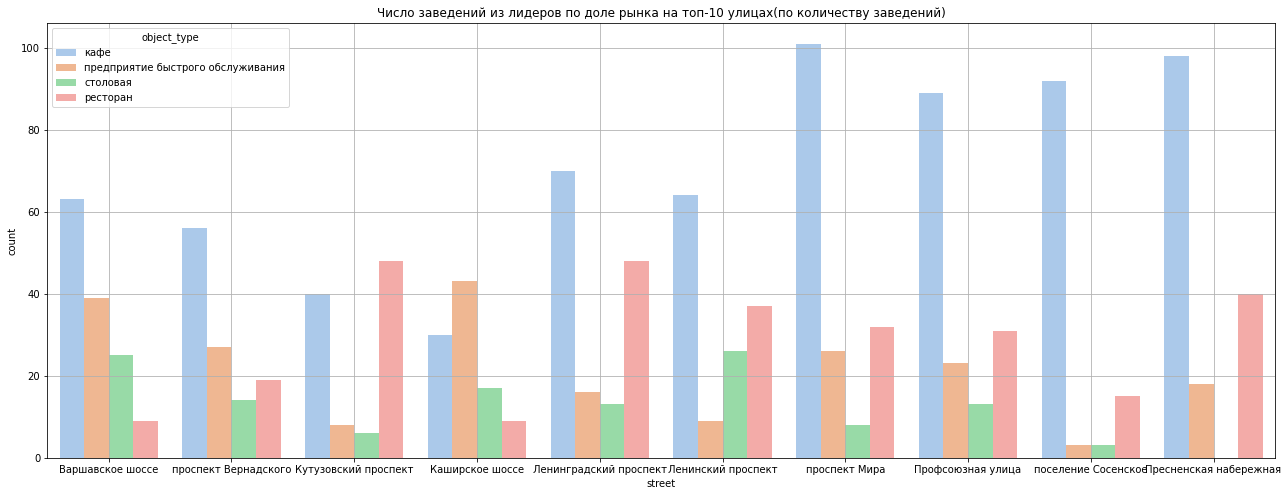

In [28]:
# на этом более удобно сравнить доли заведений на каждой удице 
plt.figure(figsize = (22,8))

sns.countplot(x = 'street', 
             hue = 'object_type', data = df_nice_obj_10)
plt.title('Число заведений из лидеров по доле рынка на топ-10 улицах(по количеству заведений)')
plt.grid()
plt.show()

Видим что кафе преобладают везде кроме Кутузовского проспекта - там больше ресторанов

Этот график несёт тот же смысл, просто можно понаводить курсор и увидеть конкретно сколько каких заведений на улицах

In [29]:
px.histogram(df_nice_obj_10, x="street", color="object_type")

<div class="alert alert-block alert-danger">✍
    

Работа с внешним источником данных
</div>

In [30]:
# ссылка на данные - https://data.mos.ru/opendata/60562/data/table?versionNumber=3&releaseNumber=776
# файл оказался слишком большим, пришлось локально удалить столбцы

#https://docs.google.com/spreadsheets/d/1ai2udns8ycrFKUSTBddx7pLg6RfVfUm0jhXgKZ09poU/edit?usp=sharing

from io import BytesIO
import requests

idf = '1ai2udns8ycrFKUSTBddx7pLg6RfVfUm0jhXgKZ09poU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(idf)


r =  requests.get(file_name)
df_distr = pd.read_csv(BytesIO(r.content))
df_distr.head()

Unnamed: 0                                                 P7  \
0           0  Наименование элемента планировочной структуры ...   
1           1                                    Косинская улица   
2           2                                    улица Панфилова   
3           3                                 9-я Парковая улица   
4           4                                   Фрязевская улица   

                           ADM_AREA                         DISTRICT  
0            Административный округ   Муниципальный округ, поселение  
1  Восточный административный округ      муниципальный округ Вешняки  
2   Северный административный округ        муниципальный округ Сокол  
3  Восточный административный округ    муниципальный округ Измайлово  
4  Восточный административный округ  муниципальный округ Новогиреево

In [31]:
df_distr = df_distr.drop(columns = ['Unnamed: 0']).rename(columns = {
    'P7' : 'street',
    'ADM_AREA' : 'adm_area',
    'DISTRICT' : 'district'
})

# получим уникальные значения районов длля топ -10 улиц
districts = df_distr[df_distr['street'].isin(df_nice_obj_10['street'].unique())]['district'].unique()


<div class="alert alert-block alert-danger">
Выведем все районы, через которые проходят улицы из ТОП-10
</div>

<div class="alert alert-info">     
Так много районов - потому что улицы могут проходить через несколько районов
    
Я локально выгрузила улицы в таблицу Excel, загрузила её в гугл карты
    (помогло - https://sdelano.media/googlemaps/)
    
    и получила вот такой результат:
</div>

ссылка на карту - https://www.google.com/maps/d/edit?mid=1ZAC_nzggx6ZywoPO1iCAH3V_6wiBXGU&usp=sharing

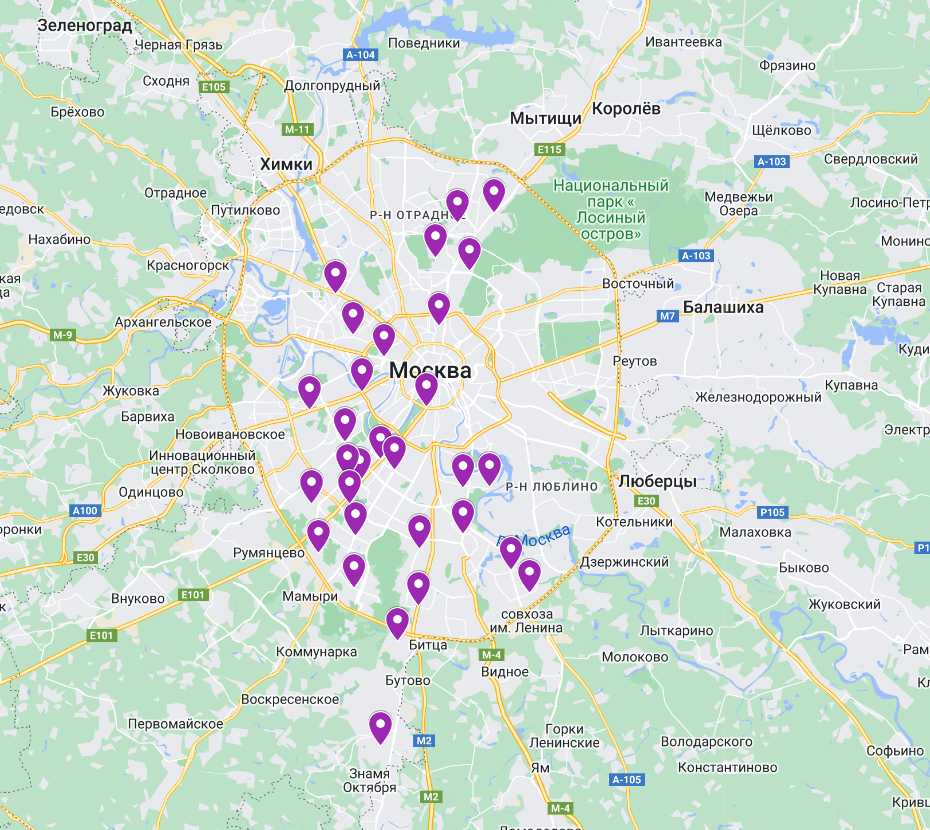


Видим что большая часть внутри МКАДа

### Найдём число улиц с одним объектом общественного питания <a name = "t9"></a>

In [32]:
df_one_place = df.groupby('street').count().reset_index()[['street', 'id']]\
                                            .rename(columns = {'street' : 'street',
                                                              'id' : 'count_place'})
df_one_place = df_one_place.query('count_place == 1')
print(len(df_one_place))

581


Видим что у нас 581 улица с одним лишь объектом питания - есть где открываться!

In [33]:
# находим район для улиц
districts_one = df_distr[df_distr['street'].isin(df_one_place['street'].unique())]['district'].unique()
print(len(districts_one))

123


Только для 123 улиц удалось определить район, но думаю нам этого хватит

на карте - https://www.google.com/maps/d/edit?mid=1pl2ZEmVY-0DPhAZYcqgfjWSZh_FF18g&usp=sharing

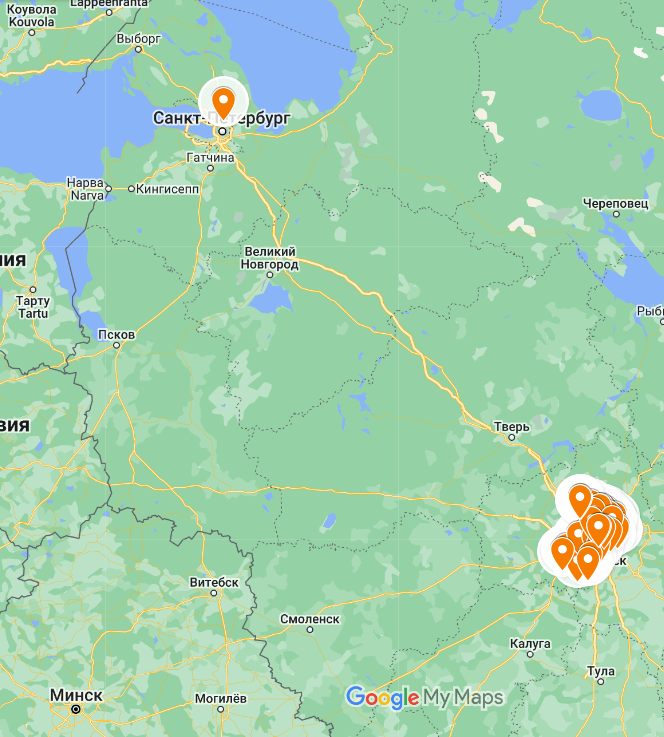

Наблюдаем какие то странные выбросы в Питере

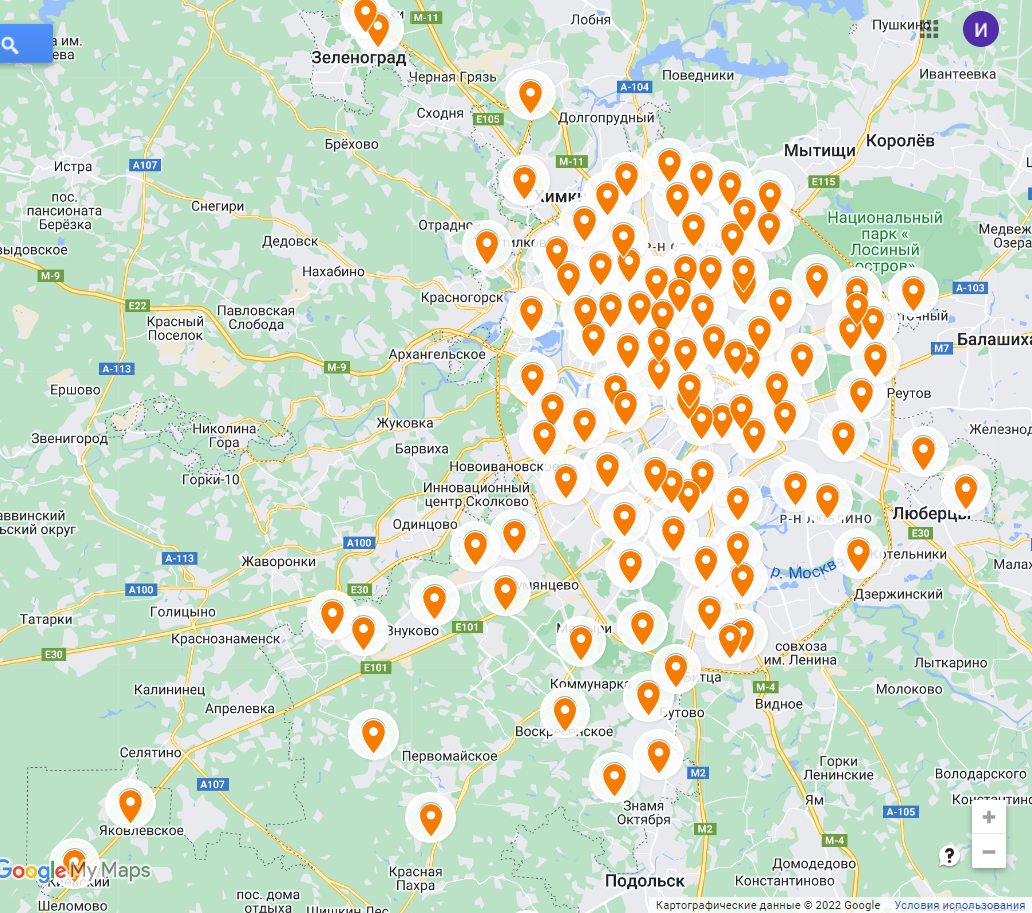

Видим что много заведений - за МКАДом , но  основная масса всё-таки внутри

### Общий вывод и презентация <a name = "t10"></a>

------
 ##### Промежуточне выводы:
>>* Рынок в основном состоит из кафе (почти 40%), столовых(17%), ресторанов(15%) и фаст-фуда(12,5%)
>>
>>* Преобладают несетевые заведения, лидерами среди доли сетевых являются :
>>    
    *  кафе
    * рестораны
    * магазины
    * предприятия быстрого обслуживания
    * закусочные

>>* для кафе и ресторанов характерно малое число заведений с большим количеством посадочных мест
>>* для закусочных и магазинов характерно много заведений с малым количеством посадочных мест
>>* для фастфуда характерно и то и другое
>>-------
>>* в основном заведения расположены в центре и близко к нему
--------

Рекомендации:
* открывать кафе или ресторан недалеко от центра, тк:
    * они являются самыми популярными (т.е пользуются спросом)
     * кафе и рестораны - лидеры по сетевому распространению = есть возможность расширяться
     * не требуется большое число заведений, удовлетворим спрос числом посадочных мест (для кафе - около 30, для ресторана - 80)
     * для сетевых заведений характерно их малое количество с малым числом посадочных мест -> люди скорее всего не будут мешать роботам


-------
Ссылка на презентацию : https://drive.google.com/file/d/16LZxQ9lKAymgTCZIqixXQnB4f7RIZKLL/view?usp=sharing
